<a href="https://colab.research.google.com/github/Kalp1774/NewRepo/blob/master/CamScanner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from ast import increment_lineno
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(790, 590, 3)
(800, 1500, 3)


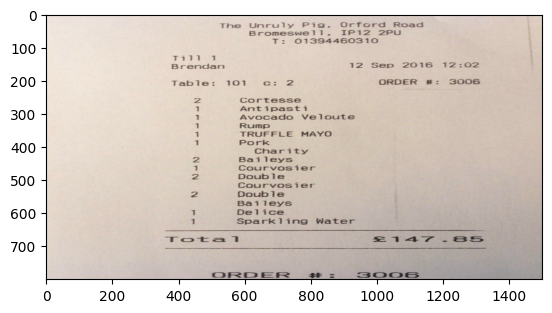

In [2]:
im_path="/bill2.jpg"
img=cv2.imread(im_path)
print(img.shape)

img=cv2.resize(img,(1500,800))

print(img.shape)

plt.imshow(img)
plt.show()

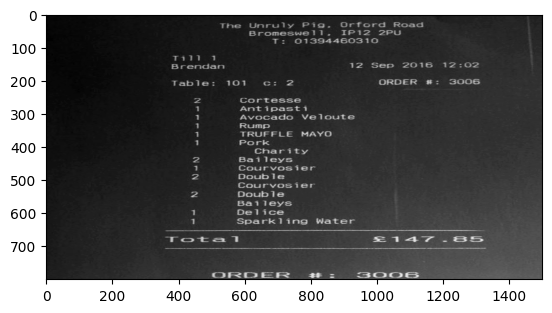

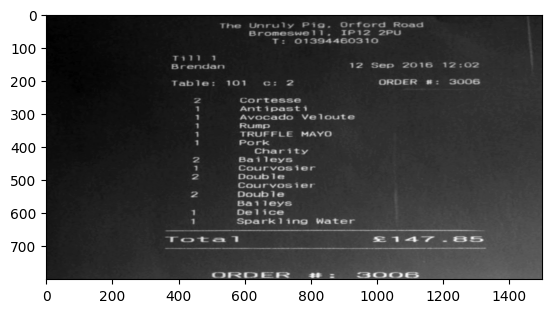

In [3]:
#remove noise

orig=img.copy()
gray=cv2.cvtColor(orig,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="binary")
plt.show()

blurred=cv2.GaussianBlur(gray,(5,5),0)
plt.imshow(blurred,cmap="binary")
plt.show()

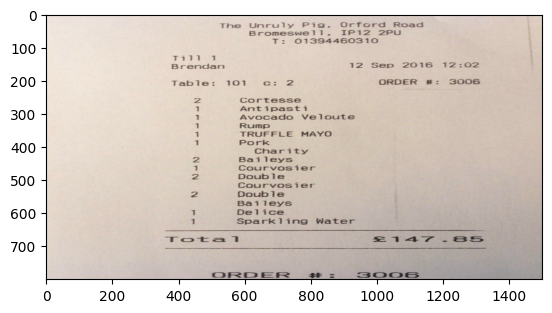

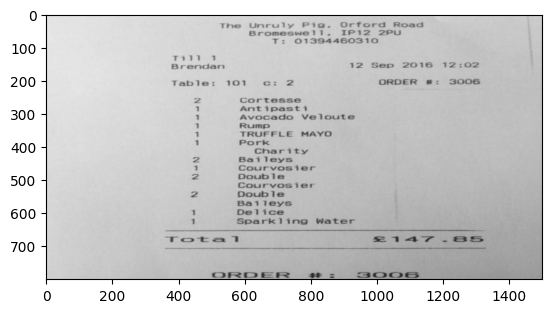

In [4]:
regen=cv2.cvtColor(blurred, cv2.COLOR_GRAY2BGR)
plt.imshow(orig)
plt.show()


plt.imshow(regen)
plt.show()

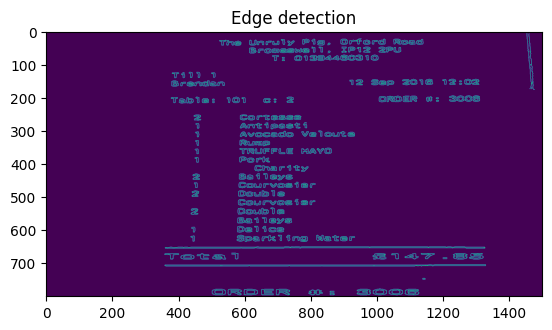

In [5]:
#edge detection
edge=cv2.Canny(blurred,0,50)
orig_edge = edge.copy()


plt.imshow(orig_edge)
plt.title("Edge detection")
plt.show()


In [6]:
#extraction
countours, _= cv2.findContours(edge,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
print(len(countours))

countours = sorted(countours ,reverse=True,key =cv2.contourArea)

821


In [7]:
#select the best counter region

for c in countours:
  p= cv2.arcLength(c,True)
  
  approx = cv2.approxPolyDP(c,0.02*p,True)

  if len(approx)==4:
    target=approx
    break

print(target.shape)

(4, 1, 2)


In [8]:
##reorder target contor
def reorder(h):

  h=h.reshape((4,2))

  print(h)

  hnew =np.zeros((4,2),dtype=np.float32 )

  add =h.sum(axis = 1)
  hnew[3]=h[np.argmax(add)]
  hnew[1]=h[np.argmax(add)]

  diff=np.diff(h,axis=1)
  hnew[0]=h[np.argmax(diff)]
  hnew[2]=h[np.argmax(diff)]

  return hnew




In [9]:
reorder=reorder(target)
print("**************")
print(reorder)

[[1463  101]
 [1470  107]
 [1472  153]
 [1469  155]]
**************
[[1469.  155.]
 [1472.  153.]
 [1469.  155.]
 [1472.  153.]]


In [10]:
##project to a fixed screen

input_reprsent = reorder

output_map =np.float32([[0,0],[800,0],[800,800],[0,800]])

In [11]:


m=cv2.getPerspectiveTransform(input_reprsent,output_map)

ans = cv2.warpPerspective(orig,m,(800,800))


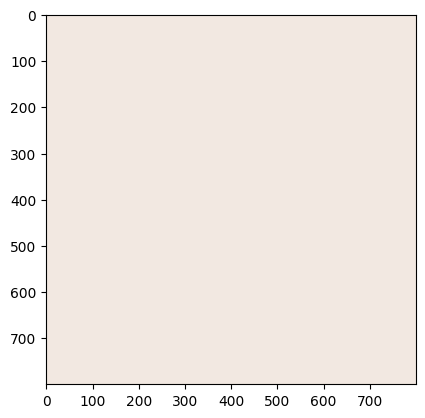

In [12]:
plt.imshow(ans)
plt.show()

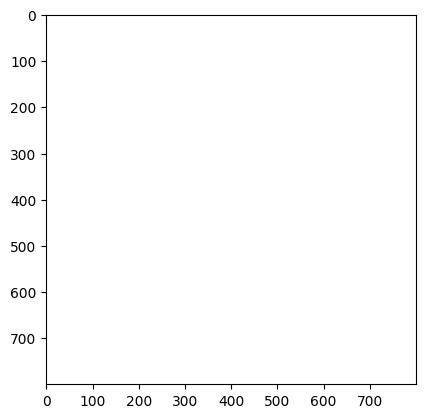

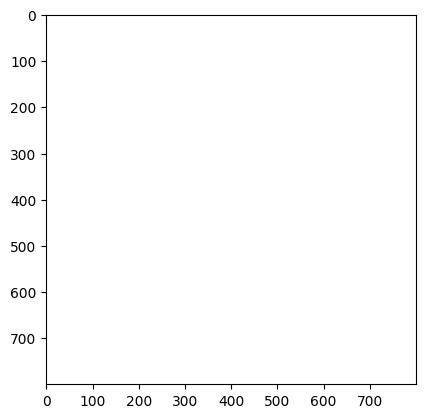

In [13]:
res = cv2.cvtColor(ans,cv2.COLOR_BGR2GRAY)

b_res =cv2.GaussianBlur(res,(3,3),0)

plt.imshow(res , cmap="binary")
plt.show()

plt.imshow(b_res , cmap="binary")
plt.show()